#REGRESION LOGISTICA
#STEVEN ARTOS
#COMENTARIOS AL FINAL DEL COLAB

#EJERCICIO
# DATASET exam1_score	exam2_score

In [44]:
#   Primero importar libreria
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report #regresion logistica o modelos binarios accuracy_score
#accuracy metrica de clasificacion o,1 numero de veces correctas/total de ejemplos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


#Scikit-learn, comúnmente abreviado como sklearn, es una biblioteca de Python muy popular para aprendizaje automático (machine learning). Proporciona herramientas simples y eficientes para la minería de datos y el análisis de datos.


In [45]:
#cargamos datos de github
url = 'https://raw.githubusercontent.com/mtgca/datasets_public/main/ex2data1.txt'
data = pd.read_csv(url)


In [46]:
data.head() #imprimir  datos
#si observamos 0 y 1 ejercicio binaro o de regresion logistica

,exam1_score,exam2_score,decision
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [47]:
X =data[['exam1_score','exam2_score']]
X.head() #imprimir  para x


,exam1_score,exam2_score
0,34.623660,78.024693
1,30.286711,43.894998
2,35.847409,72.902198
3,60.182599,86.308552
4,79.032736,75.344376


In [48]:
y = data[['decision']] #imprimir para y
y.head()

,decision
0,0
1,0
2,0
3,1
4,1


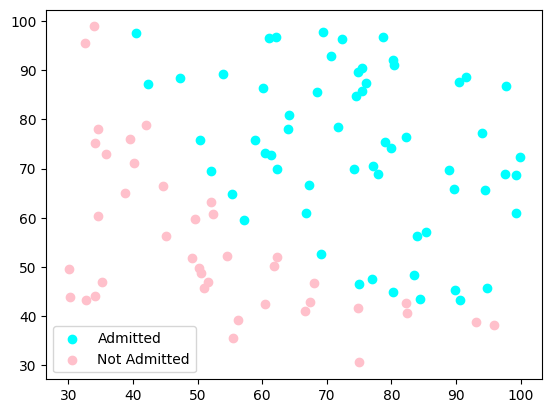

In [49]:
X_admitted = X[y['decision']==1]
plt.scatter(X_admitted['exam1_score'], X_admitted['exam2_score'], color='aqua', label='Admitted')

#diagrama de puntos

X_Not_admitted = X[y['decision']==0]
plt.scatter(X_Not_admitted['exam1_score'], X_Not_admitted['exam2_score'],color='pink',label='Not Admitted')
plt.legend()

In [50]:
# dividir mis datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# crea mi modelo
model = Pipeline ([
     ('scaler', StandardScaler()),  # Escalar los datos
     ('logistic', LogisticRegression())  # Modelo de regresión logística
                   ])

In [52]:
# entrenar mis datos
#entrenar un modelo se refiere al proceso de ajustar los parámetros
#del modelo para que pueda hacer predicciones precisas a partir de los datos.
model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [53]:
y_pred = model.predict(X_test)

In [54]:
# evaluar mi model
print(f"El accuracy del modelo es: {accuracy_score(y_test, y_pred)}")
# exactitud del modelo al 80%

El accuracy del modelo es: 0.8


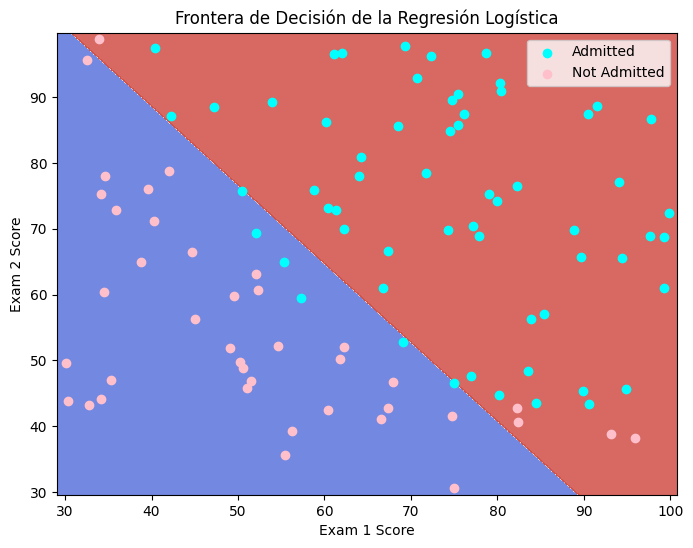

In [55]:
import numpy as np

# Crear una malla de puntos para graficar
x_min, x_max = X['exam1_score'].min() - 1, X['exam1_score'].max() + 1
y_min, y_max = X['exam2_score'].min() - 1, X['exam2_score'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Obtener las predicciones para cada punto de la malla
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar los datos y la frontera de decisión
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')  # Frontera de decisión
plt.scatter(X_admitted['exam1_score'], X_admitted['exam2_score'], label='Admitted', c='aqua')
plt.scatter(X_Not_admitted['exam1_score'], X_Not_admitted['exam2_score'], label='Not Admitted', c='pink')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend()
plt.title('Frontera de Decisión de la Regresión Logística')
plt.show()


# DATASET test1	test2
# Regresion no lineal

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [57]:
# Cargar los datos
url = 'https://raw.githubusercontent.com/mtgca/datasets_public/main/ex2data2.txt'
data = pd.read_csv(url)

# Visualizar las primeras filas
print(data.head())

      test1    test2  QA
0  0.051267  0.69956   1
1 -0.092742  0.68494   1
2 -0.213710  0.69225   1
3 -0.375000  0.50219   1
4 -0.513250  0.46564   1


In [58]:
X = data[['test1','test2']]
print(X.shape)
X.head()

(118, 2)


,test1,test2
0,0.051267,0.69956
1,-0.092742,0.68494
2,-0.213710,0.69225
3,-0.375000,0.50219
4,-0.513250,0.46564


In [59]:
y = data[['QA']]
y.head()

,QA
0,1
1,1
2,1
3,1
4,1


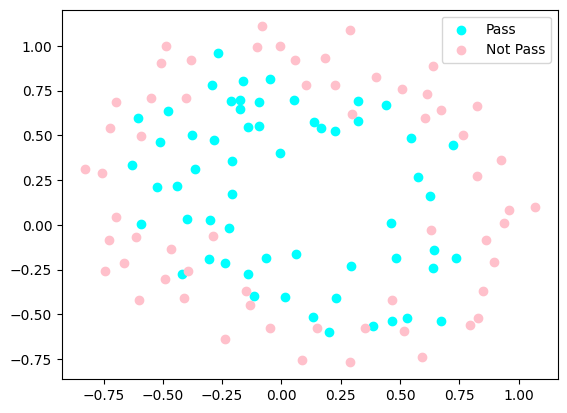

In [60]:
import matplotlib.pyplot as plt

X_admitted = X[y['QA']==1]
plt.scatter(X_admitted['test1'], X_admitted['test2'], label='Pass',color='aqua')

X_Not_admitted = X[y['QA']==0]
plt.scatter(X_Not_admitted['test1'], X_Not_admitted['test2'], label='Not Pass',color='pink')
plt.legend()



In [61]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Crear el pipeline
# Crear el pipeline con transformaciones polinómicas
degree=8

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=degree)),  # Transformaciones polinómicas
    ('scaler', StandardScaler()),           # Escalar los datos
    ('logistic', LogisticRegression())      # Modelo de regresión logística
])

In [63]:
# Entrenar el modelo

pipeline.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=8)),
                ('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [64]:
# Realizar predicciones
y_pred = pipeline.predict(X_test)

In [65]:
# Evaluar el modelo
print("Precisión del modelo:", accuracy_score(y_test, y_pred))

Precisión del modelo: 0.7916666666666666


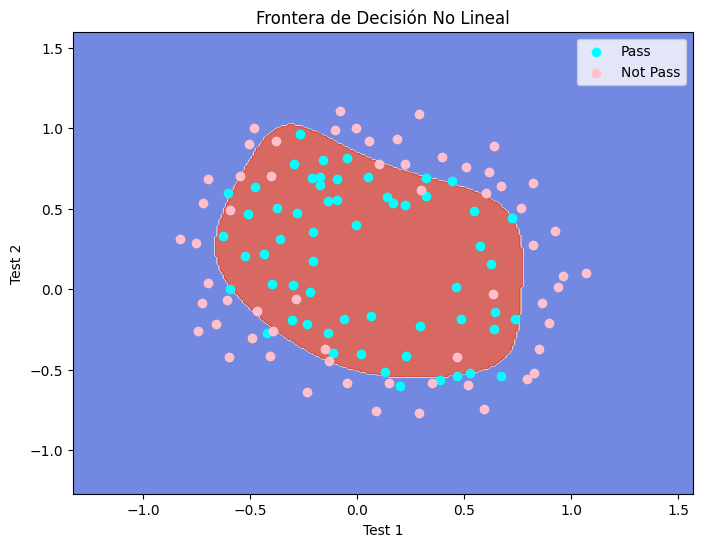

In [66]:
# Visualizar la frontera de decisión
x_min, x_max = X['test1'].min() - 0.5, X['test1'].max() + 0.5
y_min, y_max = X['test2'].min() - 0.5, X['test2'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Transformar la malla con características polinómicas
Z = pipeline.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Graficar la frontera de decisión
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')  # Frontera de decisión
plt.scatter(X_admitted['test1'], X_admitted['test2'], c='aqua', label='Pass')
plt.scatter(X_Not_admitted['test1'], X_Not_admitted['test2'], c='pink', label='Not Pass')
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.legend()
plt.title('Frontera de Decisión No Lineal')
plt.show()

# con grado #8 la frontera de decision se definira mejor se optimizara


#COMENTARIOS FINALES

#EJERCICIO
#Regresión logística
#Es un modelo estadístico utilizado para predecir la probabilidad de que un evento ocurra, basándose en uno o más factores o variables independientes. Es muy común en situaciones donde la variable dependiente es binaria o dicotómica, es decir, tiene solo dos posibles resultados (por ejemplo, "sí" o "no", "éxito" o "fracaso", "1" o "0").
#DATASET exam1_score	exam2_score

#En este ejercicio se aplicó regresión logística para clasificar a los estudiantes en admitidos o no admitidos según sus puntajes en dos exámenes. Se utilizó Pipeline para normalizar los datos con StandardScaler y entrenar el modelo con LogisticRegression. Tras dividir los datos en entrenamiento y prueba, el modelo alcanzó una precisión del 80%, indicando un buen desempeño. Las gráficas mostraron la distribución de los datos y la frontera de decisión, evidenciando que el modelo separa correctamente las clases, aunque con posibles errores en la frontera. En general, la regresión logística fue efectiva, y se podrían explorar mejoras como la inclusión de características polinómicas para casos no lineales.

# DATASET test_1 test_2

#Se trabajó con un conjunto de datos que contiene las variables test1 y test2, las cuales representan dos características que determinan si un punto pertenece a una clase (QA = 1) o no (QA = 0). A diferencia del primer ejercicio, la relación entre test1 y test2 con la variable objetivo no es lineal, por lo que se aplicó regresión logística con características polinómicas para mejorar la capacidad del modelo de capturar patrones más complejos.